In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


data_dir = '/Users/boyuliu/pyprojects/Joann/Joann-Thailand-Project/notebooks/datasets/new_dataset/'

wv1 = pd.read_csv(
        data_dir + 'regression_data_%s_20210120.csv' % 'wv_cases1')
wv2 = pd.read_csv(
        data_dir + 'regression_data_%s_20210120.csv' % 'wv_cases2')
wv3 = pd.read_csv(
        data_dir + 'regression_data_%s_20210120.csv' % 'wv_cases3')
wv4 = pd.read_csv(
        data_dir + 'regression_data_%s_20210120.csv' % 'wv_cases4')
wv1.head()

,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,ex_rate_diff_plus_7,ex_rate_diff_plus_8,ex_rate_diff_minus_1,ex_rate_diff_minus_2,ex_rate_diff_minus_3,ex_rate_diff_minus_4,ex_rate_diff_minus_5,ex_rate_diff_minus_6,ex_rate_diff_minus_7,ex_rate_diff_minus_8
0,Ang Thong,2018-02,0.0,0.0,0.0,5.00602,2018-01-08,2018-01,2018-1,-0.032813,...,-0.023320,-0.020960,0.01938,0.00484,0.000240,0.050020,-0.042060,-0.008100,-0.005965,-0.012815
1,Ang Thong,2018-03,0.0,0.0,0.0,5.02540,2018-01-15,2018-01,2018-1,0.019380,...,-0.004520,-0.023320,0.00484,0.00024,0.050020,-0.042060,-0.008100,-0.005965,-0.012815,-0.005420
2,Ang Thong,2018-04,0.0,0.0,0.0,5.03024,2018-01-22,2018-01,2018-1,0.004840,...,-0.015185,-0.004520,0.00024,0.05002,-0.042060,-0.008100,-0.005965,-0.012815,-0.005420,-0.003240
3,Ang Thong,2018-05,10.0,0.0,0.0,5.03048,2018-01-29,2018-01,2018-1,0.000240,...,-0.001075,-0.015185,0.05002,-0.04206,-0.008100,-0.005965,-0.012815,-0.005420,-0.003240,0.032500
4,Ang Thong,2018-06,0.0,0.0,0.0,5.08050,2018-02-05,2018-02,2018-1,0.050020,...,0.035820,-0.001075,-0.04206,-0.00810,-0.005965,-0.012815,-0.005420,-0.003240,0.032500,-0.004350


## remove linear trend

In [3]:
from sklearn.linear_model import LinearRegression

In [3]:
wv_data_file = 'wv_cases1'
df = wv1
df['demand_shock'] = None

for prov in df.province.unique():
    prov_row_idx = df[df.province==prov].index 
    demand_data_points = df.loc[prov_row_idx, 'total_demand'].values
    std_demand = np.std(demand_data_points)
    df.loc[[0, 1], 'demand_shock'] = np.nan # need at least two points to fit a line
    
#     i = 0
    for time_pointer in range(2, len(prov_row_idx)):
        y = demand_data_points[:time_pointer]
        x = np.arange(time_pointer).reshape(-1, 1)
        reg = LinearRegression().fit(x, y)
        expected_demand = max(reg.predict(np.matrix(time_pointer)), 0)
        demand_shock = demand_data_points[time_pointer] - expected_demand
#         print(x, y, expected_demand, demand_shock)
        df.loc[prov_row_idx[time_pointer], 'demand_shock'] = demand_shock/std_demand

#         i+=1
#         if i>3: break

    
print(df.shape)


(6554, 27)


In [4]:

    # create placeholder
for offset in range(1, 9):
    df['demand_shock_plus_%s' % offset] = None
# shift IV the other way by up to 2 months    
for offset in range(1, 9):
    df['demand_shock_minus_%s' % offset] = None

for prov in df.province.unique():
    prov_row_idx = df[df.province==prov].index 

    for offset in range(1, 9):
        df.loc[prov_row_idx, 'demand_shock_plus_%s' % offset] = df.loc[prov_row_idx, 'demand_shock'].shift(offset)
    # shift IV the other way by up to 2 months    
    for offset in range(1, 9):
        df.loc[prov_row_idx, 'demand_shock_minus_%s' % offset] = df.loc[prov_row_idx, 'demand_shock'].shift(-offset)

print(df.shape)

(6554, 43)


In [5]:
df.head()

,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,demand_shock_plus_7,demand_shock_plus_8,demand_shock_minus_1,demand_shock_minus_2,demand_shock_minus_3,demand_shock_minus_4,demand_shock_minus_5,demand_shock_minus_6,demand_shock_minus_7,demand_shock_minus_8
0,Ang Thong,2018-02,0.0,0.0,0.0,5.00602,2018-01-08,2018-01,2018-1,-0.032813,...,NaN,NaN,NaN,0,0.985677,-0.985677,-0.492839,-0.262847,1.33771,-0.809664
1,Ang Thong,2018-03,0.0,0.0,0.0,5.02540,2018-01-15,2018-01,2018-1,0.019380,...,NaN,NaN,0,0.985677,-0.985677,-0.492839,-0.262847,1.33771,-0.809664,-0.561289
2,Ang Thong,2018-04,0.0,0.0,0.0,5.03024,2018-01-22,2018-01,2018-1,0.004840,...,NaN,NaN,0.985677,-0.985677,-0.492839,-0.262847,1.33771,-0.809664,-0.561289,-0.394271
3,Ang Thong,2018-05,10.0,0.0,0.0,5.03048,2018-01-29,2018-01,2018-1,0.000240,...,NaN,NaN,-0.985677,-0.492839,-0.262847,1.33771,-0.809664,-0.561289,-0.394271,-0.277782
4,Ang Thong,2018-06,0.0,0.0,0.0,5.08050,2018-02-05,2018-02,2018-1,0.050020,...,NaN,NaN,-0.492839,-0.262847,1.33771,-0.809664,-0.561289,-0.394271,-0.277782,-0.194149


In [23]:
def yr_wk_to_float(yr_wk):
    yr, wk = yr_wk.split('-')
    return int(yr) + float(wk)/100

df['yr_wk_float'] = df.year_week.apply(yr_wk_to_float)

In [6]:
wv_data_file = 'wv_cases1'

df.to_csv(
    data_dir + 'regression_data_%s_causal_detrend_reverse_20210210.csv' % wv_data_file, 
    index=False)
df.head()

,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,demand_shock_plus_7,demand_shock_plus_8,demand_shock_minus_1,demand_shock_minus_2,demand_shock_minus_3,demand_shock_minus_4,demand_shock_minus_5,demand_shock_minus_6,demand_shock_minus_7,demand_shock_minus_8
0,Ang Thong,2018-02,0.0,0.0,0.0,5.00602,2018-01-08,2018-01,2018-1,-0.032813,...,NaN,NaN,NaN,0,0.985677,-0.985677,-0.492839,-0.262847,1.33771,-0.809664
1,Ang Thong,2018-03,0.0,0.0,0.0,5.02540,2018-01-15,2018-01,2018-1,0.019380,...,NaN,NaN,0,0.985677,-0.985677,-0.492839,-0.262847,1.33771,-0.809664,-0.561289
2,Ang Thong,2018-04,0.0,0.0,0.0,5.03024,2018-01-22,2018-01,2018-1,0.004840,...,NaN,NaN,0.985677,-0.985677,-0.492839,-0.262847,1.33771,-0.809664,-0.561289,-0.394271
3,Ang Thong,2018-05,10.0,0.0,0.0,5.03048,2018-01-29,2018-01,2018-1,0.000240,...,NaN,NaN,-0.985677,-0.492839,-0.262847,1.33771,-0.809664,-0.561289,-0.394271,-0.277782
4,Ang Thong,2018-06,0.0,0.0,0.0,5.08050,2018-02-05,2018-02,2018-1,0.050020,...,NaN,NaN,-0.492839,-0.262847,1.33771,-0.809664,-0.561289,-0.394271,-0.277782,-0.194149


In [7]:
df.columns

Index(['province', 'year_week', 'total_demand', 'perc_abuse', 'wv_count',
       'ex_rate', 'fake_date', 'month', 'quarter', 'ex_rate_diff',
       'ex_rate_diff_plus_1', 'ex_rate_diff_plus_2', 'ex_rate_diff_plus_3',
       'ex_rate_diff_plus_4', 'ex_rate_diff_plus_5', 'ex_rate_diff_plus_6',
       'ex_rate_diff_plus_7', 'ex_rate_diff_plus_8', 'ex_rate_diff_minus_1',
       'ex_rate_diff_minus_2', 'ex_rate_diff_minus_3', 'ex_rate_diff_minus_4',
       'ex_rate_diff_minus_5', 'ex_rate_diff_minus_6', 'ex_rate_diff_minus_7',
       'ex_rate_diff_minus_8', 'demand_shock', 'demand_shock_plus_1',
       'demand_shock_plus_2', 'demand_shock_plus_3', 'demand_shock_plus_4',
       'demand_shock_plus_5', 'demand_shock_plus_6', 'demand_shock_plus_7',
       'demand_shock_plus_8', 'demand_shock_minus_1', 'demand_shock_minus_2',
       'demand_shock_minus_3', 'demand_shock_minus_4', 'demand_shock_minus_5',
       'demand_shock_minus_6', 'demand_shock_minus_7', 'demand_shock_minus_8'],
      dtype='

In [9]:
data_dir + 'regression_data_%s_causal_detrend_reverse_20210210.csv' % wv_data_file

'/Users/boyuliu/pyprojects/Joann/Joann-Thailand-Project/notebooks/datasets/new_dataset/regression_data_wv_cases1_causal_detrend_reverse_20210210.csv'

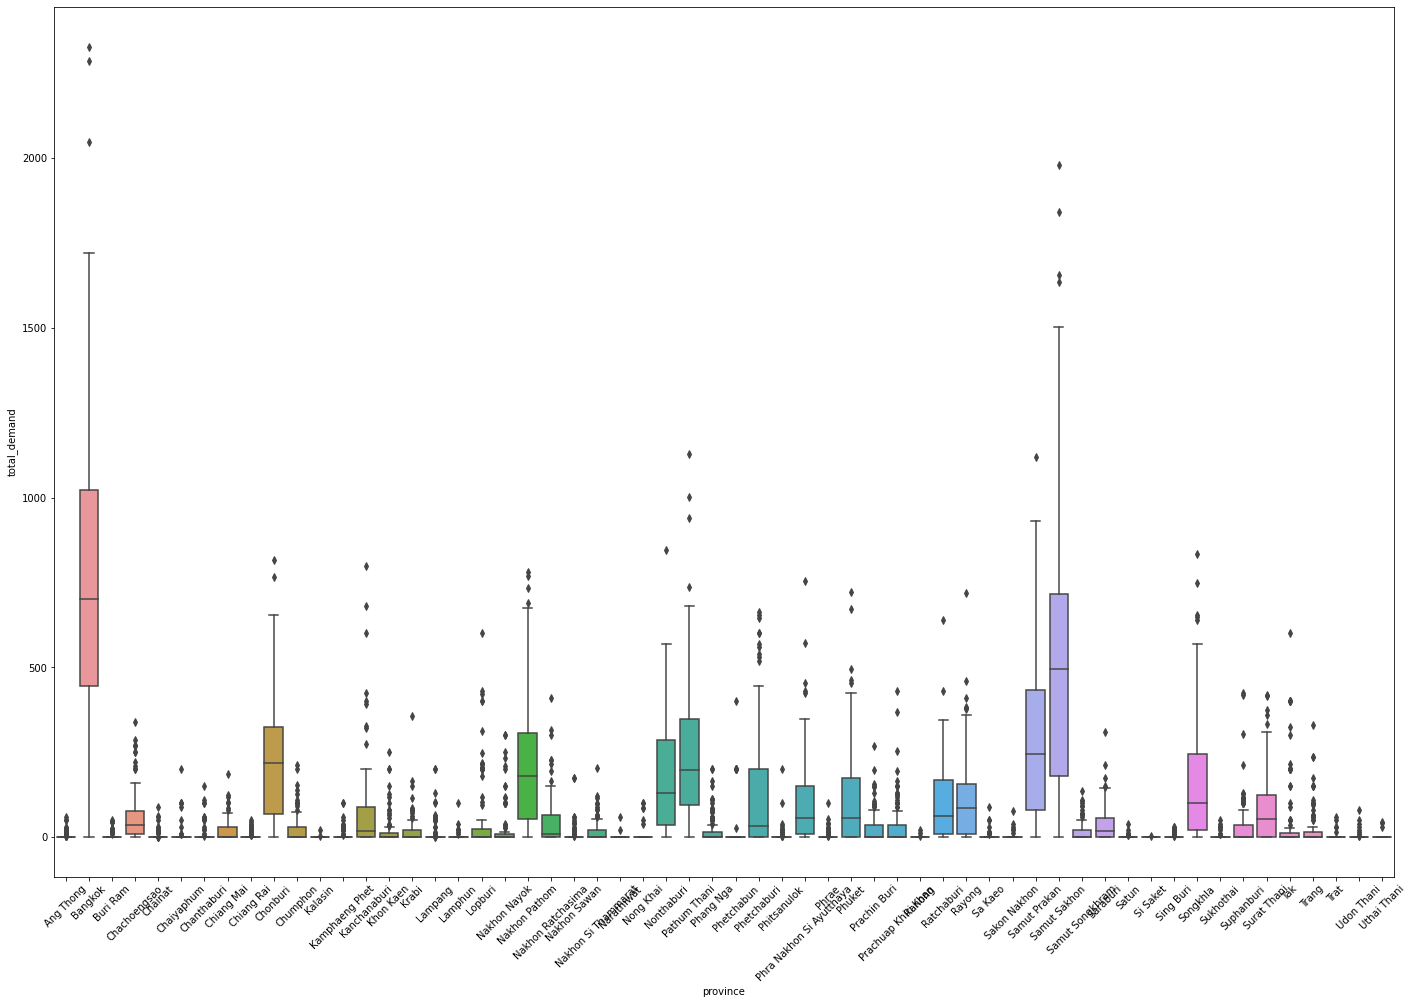

In [10]:
a4_dims = (24, 16)
fig, ax = plt.subplots(figsize=a4_dims)

df['total_demand'] = df['total_demand'].astype(float)
bxplot = sns.boxplot(data=df, x='province', y='total_demand')
for item in bxplot.get_xticklabels():
    item.set_rotation(45)
plt.show()

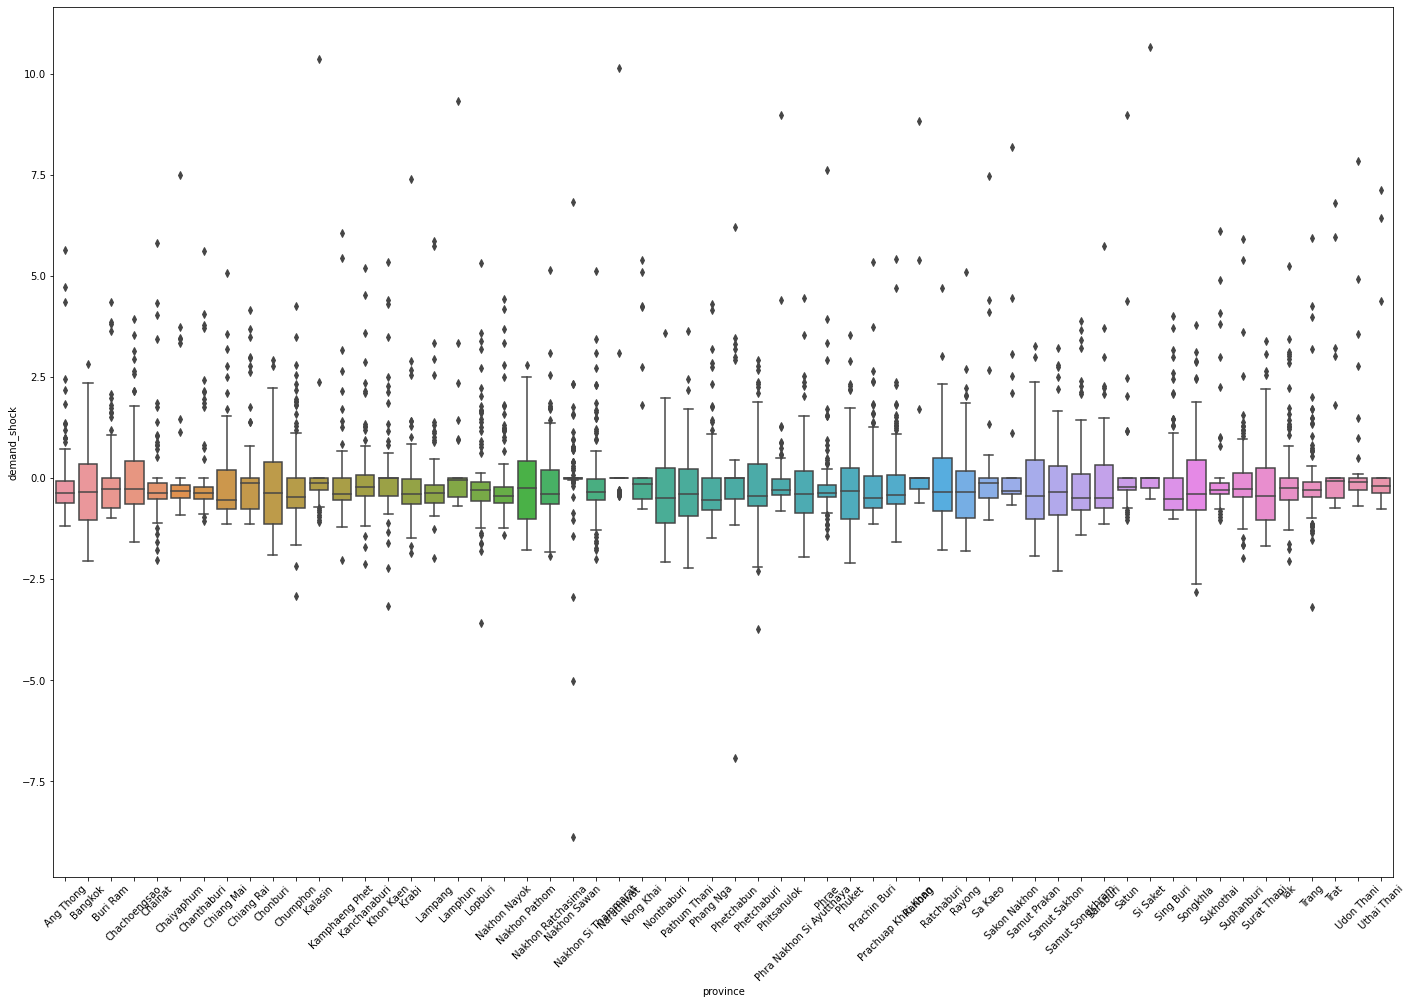

In [11]:
a4_dims = (24, 16)
fig, ax = plt.subplots(figsize=a4_dims)

df['demand_shock'] = df['demand_shock'].astype(float)
bxplot = sns.boxplot(data=df, x='province', y='demand_shock')
for item in bxplot.get_xticklabels():
    item.set_rotation(45)
plt.show()

## sandbox

In [6]:
wv_data_file = 'wv_cases1'
df = wv1
df['demand_shock'] = None

for prov in df.province.unique():
    prov_row_idx = df[df.province==prov].index 
    demand_data_points = df.loc[prov_row_idx, 'total_demand'].values
    std_demand = np.std(demand_data_points)
    df.loc[[0, 1], 'demand_shock'] = np.nan # need at least two points to fit a line
    
    i = 0
    for time_pointer in range(2, len(prov_row_idx)):
        y = demand_data_points[:time_pointer]
        x = np.arange(time_pointer).reshape(-1, 1)
        reg = LinearRegression().fit(x, y)
        expected = reg.predict(np.matrix(time_pointer))
        print(expected)
        expected_demand = max(expected, 0)
        demand_shock = demand_data_points[time_pointer] - expected_demand
#         print(x, y, expected_demand, demand_shock)
        df.loc[prov_row_idx[time_pointer], 'demand_shock'] = demand_shock/std_demand
        import pdb; pdb.set_trace()
        i+=1
        if i>3: break

    
print(df.shape)


[0.]
> <ipython-input-6-d3b9b57ea10a>(23)<module>()
-> i+=1
(Pdb) expected_demand
array([0.])
(Pdb) demand_shock
array([0.])
(Pdb) demand_data_points[time_pointer]
0.0
(Pdb) time_pointer
2
(Pdb) demand_data_points
array([ 0.,  0.,  0., 10.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., 25.,  0.,  0.,  0.,  4.,  0., 60.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,
        0.,  0.,  0.,  0.,  5.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,
        0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,
        0., 50., 15.,  0., 10.,  5., 50., 15.,  0.,  0., 30.,  0., 21.,
        0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  5.,  0.,  0., 10., 26.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.])
(Pdb) df.loc[prov_row_idx[time_pointer], 'demand_shock']
0.0
(Pdb) n
> <ipython-input-6-d3b9b57ea10a>(24)<module>()
-> if i>3: break
(Pdb) n
> <ipython-input

BdbQuit: 